# Mount The Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load Library

## Preprocessing Data Komentar Youtube Klarifikasi Kemunculan Warna Kuning Pada Rangka Honda

In [2]:
# Import Library
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
import ast
import itertools
import seaborn as sns
import pytz
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
!pip install sastrawi
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Import data
# data = pd.read_excel('/content/gdrive/MyDrive/Klarifikasi_Kemunculan_Warna_Kuning_Pada_Rangka_Honda.xlsx')

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Klarifikasi_Kemunculan_Warna_Kuning_Pada_Rangka_Honda.xlsx')
data

,id,author,description,guid,to,likecount,link,pubdate,replycount,title,authorChannelUrl
0,1,@Mhmmdderry123-xv4vq,malu sama kaleng sarden dan hongguan yg bisa t...,UgwKQ3GYAXUYe1jjFjV4AaABAg,NaN,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2024-02-08 19:03:15,0,malu sama kaleng sarden dan hongguan yg bisa t...,http://www.youtube.com/@Mhmmdderry123-xv4vq
1,2,@aleixespargaro041,"Berguna kagak, membodohi iya.. 💀",UgxZdS6TBiXG9ogVDUh4AaABAg,NaN,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2024-02-03 04:06:49,0,"Berguna kagak, membodohi iya.. 💀",http://www.youtube.com/@aleixespargaro041
2,3,@zikrinugraha8815,Berhentikan rangka esaf🤬,UgyB9P2sraUgRL9NQtF4AaABAg,NaN,2,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2024-01-01 22:55:18,0,Berhentikan rangka esaf🤬,http://www.youtube.com/@zikrinugraha8815
3,4,@zakupertama4521,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",UgwFHaqK6d-tlpLbUXJ4AaABAg,NaN,1,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-12-31 01:55:09,0,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",http://www.youtube.com/@zakupertama4521
4,5,@peutbikers6467,Mana penjelasan honda jngn lepas tangan,UgwLeKdrlcwlqWQeKVF4AaABAg,NaN,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-12-30 10:38:28,0,Mana penjelasan honda jngn lepas tangan,http://www.youtube.com/@peutbikers6467
...,...,...,...,...,...,...,...,...,...,...,...
2350,2351,@fikihiro5642,@@mastris9097 omong kosong.. fakta di lapangan...,UgzjvsVxuLC81-_jq954AaABAg.9tkjuym2NjJ9tko5fe2peJ,@mahonicus,1,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-08-23 07:46:45,0,@@mastris9097 omong kosong.. fakta di lapangan...,http://www.youtube.com/@fikihiro5642
2351,2352,@user-ot5fz9wm9y,​@@fikihiro5642standar pabriknya rendah bang wkwk,UgzjvsVxuLC81-_jq954AaABAg.9tkjuym2NjJ9tkp2IGvkpK,@mahonicus,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-08-23 07:55:02,0,​@@fikihiro5642standar pabriknya rendah bang wkwk,http://www.youtube.com/@user-ot5fz9wm9y
2352,2353,@kunciirmv6357,​@@mastris9097sales ngondah ya bang😂,UgzjvsVxuLC81-_jq954AaABAg.9tkjuym2NjJ9tkt23ougy5,@mahonicus,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-08-23 08:29:57,0,​@@mastris9097sales ngondah ya bang😂,http://www.youtube.com/@kunciirmv6357
2353,2354,@edoserputra9554,Pertama min 😂,Ugztdx3ma92WsTH4BF14AaABAg,NaN,0,https://www.youtube.com/watch?v=I_yGonlanTk&lc...,2023-08-23 07:09:43,0,Pertama min 😂,http://www.youtube.com/@edoserputra9554


In [4]:
data.drop(['id', 'author', 'guid', 'to', 'likecount', 'link', 'replycount', 'title', 'authorChannelUrl'], axis=1, inplace=True)
data

,description,pubdate
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28
...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57
2353,Pertama min 😂,2023-08-23 07:09:43


### Langkah-Langkah Preprocessing Data
### 1. Data Cleansing (Remove Regex)
Tujuan dari Cleansing ini adalah untuk Menghapus tanda baca, url, hashtagh,karakter, angka dan lain-lain (DAPAT DITAMBAHKAN LEBIH BANYAK)

In [5]:
# Custom replacements dictionary (CUSTOM UNTUK CLEANSING)
custom_replacements = {
    "debes": "the best",
    "Amplikasi": "aplikasi",
    "wkwkk": " ",
    "wkwkkww": " ",
    "wkwk": " ",
}

# Proses Cleansing Data
def remove(Text, replacements=None):
    # remove stock market tickers like $GE
    Text = re.sub(r'\$\w*', '',str(Text))
    # replace kata yang berulang-ulang ('oooooo' menjadi '00')
    Text = re.sub(r'(.)\1+', r'\1\1', Text)
    # Replace 2+ dots with space
    Text = re.sub(r'\.{2,}', ' ', Text)
    #remove @username
    Text = re.sub('@[^\s]+','',Text)
    # remove old style retweet Text "RT"
    Text = re.sub(r'^RT[\s]+', '', Text)
    #remove angka
    Text = re.sub('[0-9]+', '', Text)
    #remove url
    Text = re.sub(r"http\S+", "", Text)
    # remove hashtags
    Text = re.sub(r'#', '', Text)
    # Strip space, " and ' from tweet
    Text = Text.strip(' "\'')
    # Replace multiple spaces with a single space
    Text = re.sub(r'\s+', ' ', Text)
    #hapus tanda baca
    Text = Text.translate(str.maketrans("","",string.punctuation))
    #hapus karakter
    # Apply custom replacements if provided
    if replacements:
        for old, new in replacements.items():
            Text = Text.replace(old, new)
    #Hapus kata yang tidak diperlukan

    return Text

data['clean'] = data['description'].apply(lambda x: remove(x, custom_replacements))

data

,description,pubdate,clean
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,Berguna kagak membodohi iya 💀
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,Berhentikan rangka esaf🤬
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di rangka esaf itu EMAS TAI bukan KARAT
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,Mana penjelasan honda jngn lepas tangan
...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara 🤪
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,​ pabriknya rendah bang
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,​ ngondah ya bang😂
2353,Pertama min 😂,2023-08-23 07:09:43,Pertama min 😂


### 2. Case Folding & Clean Emoji
Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima.

In [6]:
def clean_tweet(text):
  # Mengubah teks ke lowercase
  text = text.lower()

  # Menghapus emoticon
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)

  # Menghapus non ASCII character
  encoded_string = text.encode("ascii", "ignore")
  text = encoded_string.decode()

  return(text)

In [7]:
data['clean'] = data['clean'].astype(str)
data['clean'] = data['clean'].apply(lambda x:clean_tweet(x))
data

,description,pubdate,clean
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan rangka esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di rangka esaf itu emas tai bukan karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan honda jngn lepas tangan
...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah ya bang
2353,Pertama min 😂,2023-08-23 07:09:43,pertama min


In [8]:
kata_tidak_diinginkan = ['motor', 'Motor', 'honda', 'Honda','yamaha', 'silikat', 'nya', 'ya', 'suzuki', 'kawasaki', 'rangka', 'wkwk', 'min']

In [9]:
def clean_teks(teks, kata_tidak_diinginkan=kata_tidak_diinginkan):
    # Tokenisasi teks
    kata_kata = word_tokenize(teks)

    # Hilangkan kata yang tidak diinginkan
    kata_kata_bersih = [kata for kata in kata_kata if kata not in kata_tidak_diinginkan and kata.isalnum()]

    # Gabungkan kembali kata-kata menjadi satu string
    teks_bersih = ' '.join(kata_kata_bersih)

    return teks_bersih

In [10]:
data['clean'] = data['clean'].apply(lambda x: clean_teks(x, kata_tidak_diinginkan))
data

,description,pubdate,clean
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan
...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah bang
2353,Pertama min 😂,2023-08-23 07:09:43,pertama


### 3. Slang Word (Kata Alay) Normalization
bertujuan merubah kata-kata slang (kata alay) menjadi kata baku. Proses ini memerlukan kamus slang word dalam csv.

In [11]:
# Import Kamus
# df_slang = pd.read_csv('/content/gdrive/MyDrive/sentiment analysis Yuki/colloquial-indonesian-lexicon.csv')

df_slang = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/colloquial-indonesian-lexicon.csv')

In [12]:
df_slang.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


## CREATE CUSTOM SLANG

membuat kata alay sesuai dengan yang ada di dalam daaset (DAPAT DITAMBAHKAN LEBIH BANYAK)

In [13]:
# Drop unnecessary columns from the original slang DataFrame
df_slang = df_slang[['slang', 'formal']]

# Create a DataFrame with custom slang words
custom_slang_data = {
    'slang': [
        'aasuu', 'aaddoohh', 'aahbangsatboikot', 'aassuu', 'kagak', 'youtubenya', 'youtuber', 'yt', 'yth', 'yuk', 'yutuber', 'yuutubberr',
        'asudahlah', 'adaharga', 'jngn', 'odgj', 'ketahun', 'batjot', 'andjink', 'doank', 'fb',
        'recal', 'nyet'
    ],
    'formal': [
        'asu', 'aduh', 'bangsat', 'asu', 'tidak', 'youtube', 'youtuber', 'youtube', 'yth', 'ayo', 'youtuber', 'youtuber',
        'ah sudahlah', 'ada harga', 'jangan', 'orang dengan gangguan jiwa', 'ketahuan', 'bacot', 'anjing', 'doang', 'facebook',
        'recall', 'monyet'
    ]
}

df_custom_slang = pd.DataFrame(custom_slang_data)

# Append the custom slang DataFrame to the original DataFrame
df_combined_slang = pd.concat([df_slang, df_custom_slang], ignore_index=True)


In [14]:
# Define the function to replace slang words
def replace_slang(tweets):
    tweets = tweets.lower()
    res = ''
    for item in tweets.split():
        if item in df_combined_slang.slang.values:
            res += df_combined_slang[df_combined_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res.strip()  # Remove the trailing space

In [15]:
# # Proses Slang Word
# def replace_slang(tweets):
#     tweets = tweets.lower()
#     res = ''
#     for item in tweets.split():
#         if item in df_slang.slang.values:
#             res += df_slang[df_slang['slang'] == item]['formal'].iloc[0]
#         else:
#             res += item
#         res += ' '
#     return res

In [16]:
data['normalize'] = data['clean'].apply(replace_slang)
data

,description,pubdate,clean,normalize
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan
...,...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah bang,ngondah bang
2353,Pertama min 😂,2023-08-23 07:09:43,pertama,pertama


### 4. Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token

In [17]:
# proses tokenizing, proses pemisahan kata
#NLTK word tokenize
def word_tokenize_wrapper(Tweets):
 return word_tokenize(Tweets)
data['Tokenizing'] = data['normalize'].apply(word_tokenize_wrapper)
data

,description,pubdate,clean,normalize,Tokenizing
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya..."
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]"
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]"
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]"
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]"
...,...,...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber..."
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]"
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah bang,ngondah bang,"[ngondah, bang]"
2353,Pertama min 😂,2023-08-23 07:09:43,pertama,pertama,[pertama]


### 4. Filtering (Stopword Removal)
Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

In [18]:
#Proses Stopword Removal
def stopword_removal(Tweets):
    filtering = stopwords.words('indonesian','english')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Tweets)
    for x in fit:
        data.append(x)
    return data
data['Filtering'] = data['Tokenizing'].apply(stopword_removal)
data

,description,pubdate,clean,normalize,Tokenizing,Filtering
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya...","[malu, kaleng, sarden, hongguan, tahan, bertah..."
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]","[berguna, membodohi, iya]"
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]","[berhentikan, esaf]"
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]","[kuning, esaf, emas, tahi, karat]"
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]","[penjelasan, lepas, tangan]"
...,...,...,...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber...","[omong, kosong, fakta, lapangan, berbicara]"
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]","[pabriknya, rendah, bang]"
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah bang,ngondah bang,"[ngondah, bang]","[ngondah, bang]"
2353,Pertama min 😂,2023-08-23 07:09:43,pertama,pertama,[pertama],[]


### 5. Stemming
Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar

In [19]:
# # proses stemming
# def stemming(Tweets):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for w in Tweets:
#         dt = stemmer.stem(w)
#         do.append(dt)
#     d_clean=[]
#     d_clean=" ".join(do)
#     print(d_clean)
#     return d_clean
# data['Stemming'] = data['Filtering'].apply(stemming)
# data

# Initialize the stemmer once
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Optimized stemming function
def stemming(tweet):
    return " ".join([stemmer.stem(word) for word in tweet])

# Apply the stemming function to the 'Filtering' column
data['Stemming'] = data['Filtering'].apply(stemming)

data

,description,pubdate,clean,normalize,Tokenizing,Filtering,Stemming
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya...","[malu, kaleng, sarden, hongguan, tahan, bertah...",malu kaleng sarden hongguan tahan tahun ah
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]","[berguna, membodohi, iya]",guna bodoh iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]","[berhentikan, esaf]",henti esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]","[kuning, esaf, emas, tahi, karat]",kuning esaf emas tahi karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]","[penjelasan, lepas, tangan]",jelas lepas tangan
...,...,...,...,...,...,...,...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber...","[omong, kosong, fakta, lapangan, berbicara]",omong kosong fakta lapang bicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]","[pabriknya, rendah, bang]",pabrik rendah bang
2352,​@@mastris9097sales ngondah ya bang😂,2023-08-23 08:29:57,ngondah bang,ngondah bang,"[ngondah, bang]","[ngondah, bang]",ngondah bang
2353,Pertama min 😂,2023-08-23 07:09:43,pertama,pertama,[pertama],[],


In [20]:
# Hapus Data Duplikat
data.drop_duplicates(subset=["Stemming"], keep="first", inplace=True)
data

,description,pubdate,clean,normalize,Tokenizing,Filtering,Stemming
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya...","[malu, kaleng, sarden, hongguan, tahan, bertah...",malu kaleng sarden hongguan tahan tahun ah
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]","[berguna, membodohi, iya]",guna bodoh iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]","[berhentikan, esaf]",henti esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]","[kuning, esaf, emas, tahi, karat]",kuning esaf emas tahi karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]","[penjelasan, lepas, tangan]",jelas lepas tangan
...,...,...,...,...,...,...,...
2348,"Iya juga ya, kenapa gak sekalian aja?",2023-08-23 07:21:32,iya juga kenapa gak sekalian aja,iya juga kenapa enggak sekalian saja,"[iya, juga, kenapa, enggak, sekalian, saja]",[iya],iya
2349,sambungan rangka Las kusunya buat rangka esaf ...,2023-08-23 07:34:09,sambungan las kusunya buat esaf memang begitu ...,sambungan las kusunya buat esaf memang begitu ...,"[sambungan, las, kusunya, buat, esaf, memang, ...","[sambungan, las, kusunya, esaf, hawatir, pokoe...",sambung las kusu esaf hawatir pokoe unit tanga...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber...","[omong, kosong, fakta, lapangan, berbicara]",omong kosong fakta lapang bicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]","[pabriknya, rendah, bang]",pabrik rendah bang


In [21]:
data

,description,pubdate,clean,normalize,Tokenizing,Filtering,Stemming
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya...","[malu, kaleng, sarden, hongguan, tahan, bertah...",malu kaleng sarden hongguan tahan tahun ah
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]","[berguna, membodohi, iya]",guna bodoh iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]","[berhentikan, esaf]",henti esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]","[kuning, esaf, emas, tahi, karat]",kuning esaf emas tahi karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]","[penjelasan, lepas, tangan]",jelas lepas tangan
...,...,...,...,...,...,...,...
2348,"Iya juga ya, kenapa gak sekalian aja?",2023-08-23 07:21:32,iya juga kenapa gak sekalian aja,iya juga kenapa enggak sekalian saja,"[iya, juga, kenapa, enggak, sekalian, saja]",[iya],iya
2349,sambungan rangka Las kusunya buat rangka esaf ...,2023-08-23 07:34:09,sambungan las kusunya buat esaf memang begitu ...,sambungan las kusunya buat esaf memang begitu ...,"[sambungan, las, kusunya, buat, esaf, memang, ...","[sambungan, las, kusunya, esaf, hawatir, pokoe...",sambung las kusu esaf hawatir pokoe unit tanga...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber...","[omong, kosong, fakta, lapangan, berbicara]",omong kosong fakta lapang bicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]","[pabriknya, rendah, bang]",pabrik rendah bang


In [22]:
# Export Data
from datetime import datetime
# Get the current date and time
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Create the filename with the current date and time
filename = f'hasil_preprocessing_komentar_youtube_{current_time}.xlsx'
# Export DataFrame to Excel
data.to_excel(filename, index=False)

# Labeling Dengan Lexicon Based


Labeling dengan lexicon-based merupakan pendekatan dalam analisis sentimen di mana teks atau kalimat diberi label berdasarkan kumpulan kata atau kamus tertentu yang memiliki nilai sentimen yang sudah ditentukan sebelumnya. Lexicon atau leksikon merupakan daftar kata-kata beserta nilai sentimen yang terkait dengan kata-kata tersebut. Pendekatan ini bergantung pada kata-kata dalam lexicon untuk menentukan sentimen dari suatu teks.

Misalnya, Anda memiliki sebuah kalimat, dan untuk setiap kata dalam kalimat tersebut, Anda memeriksa apakah kata tersebut ada dalam lexicon dan memiliki nilai sentimen tertentu. Dengan mengumpulkan nilai-nilai sentimen dari setiap kata yang ditemukan, Anda dapat membuat estimasi terhadap sentimen keseluruhan dari teks tersebut.

File leksikon yang disediakan melalui referensi-referensi yang Anda sebutkan kemungkinan berisi kumpulan kata-kata bersama dengan nilai-nilai sentimen yang sudah ditetapkan sebelumnya. Lexicon ini bisa berisi daftar kata-kata positif, negatif, atau netral, dengan nilai-nilai tertentu yang menunjukkan tingkat sentimen dari kata-kata tersebut.

Dalam analisis sentimen berbasis lexicon, langkah pertama biasanya adalah memuat leksikon ke dalam program, lalu mengidentifikasi kata-kata dalam teks yang ada di leksikon tersebut, dan terakhir, menghitung atau menggabungkan nilai-nilai sentimen dari setiap kata untuk menentukan sentimen keseluruhan dari teks tersebut.

lexicon kami mengambil dari akun github milik Evan Mertua : https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based

References: https://github.com/louisowen6/NLP_bahasa_resources
https://github.com/fajri91/InSet
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt
https://devtrik.com/python/steeming-bahasa-indonesia-python-sastrawi/
https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf


In [23]:
# Import data
df = data
df

,description,pubdate,clean,normalize,Tokenizing,Filtering,Stemming
0,malu sama kaleng sarden dan hongguan yg bisa t...,2024-02-08 19:03:15,malu sama kaleng sarden dan hongguan yg bisa t...,malu sama kaleng sarden dan hongguan yang bisa...,"[malu, sama, kaleng, sarden, dan, hongguan, ya...","[malu, kaleng, sarden, hongguan, tahan, bertah...",malu kaleng sarden hongguan tahan tahun ah
1,"Berguna kagak, membodohi iya.. 💀",2024-02-03 04:06:49,berguna kagak membodohi iya,berguna tidak membodohi iya,"[berguna, tidak, membodohi, iya]","[berguna, membodohi, iya]",guna bodoh iya
2,Berhentikan rangka esaf🤬,2024-01-01 22:55:18,berhentikan esaf,berhentikan esaf,"[berhentikan, esaf]","[berhentikan, esaf]",henti esaf
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",2023-12-31 01:55:09,kuning di esaf itu emas tai bukan karat,kuning di esaf itu emas tahi bukan karat,"[kuning, di, esaf, itu, emas, tahi, bukan, karat]","[kuning, esaf, emas, tahi, karat]",kuning esaf emas tahi karat
4,Mana penjelasan honda jngn lepas tangan,2023-12-30 10:38:28,mana penjelasan jngn lepas tangan,mana penjelasan jangan lepas tangan,"[mana, penjelasan, jangan, lepas, tangan]","[penjelasan, lepas, tangan]",jelas lepas tangan
...,...,...,...,...,...,...,...
2348,"Iya juga ya, kenapa gak sekalian aja?",2023-08-23 07:21:32,iya juga kenapa gak sekalian aja,iya juga kenapa enggak sekalian saja,"[iya, juga, kenapa, enggak, sekalian, saja]",[iya],iya
2349,sambungan rangka Las kusunya buat rangka esaf ...,2023-08-23 07:34:09,sambungan las kusunya buat esaf memang begitu ...,sambungan las kusunya buat esaf memang begitu ...,"[sambungan, las, kusunya, buat, esaf, memang, ...","[sambungan, las, kusunya, esaf, hawatir, pokoe...",sambung las kusu esaf hawatir pokoe unit tanga...
2350,@@mastris9097 omong kosong.. fakta di lapangan...,2023-08-23 07:46:45,omong kosong fakta di lapangan yg berbicara,omong kosong fakta di lapangan yang berbicara,"[omong, kosong, fakta, di, lapangan, yang, ber...","[omong, kosong, fakta, lapangan, berbicara]",omong kosong fakta lapang bicara
2351,​@@fikihiro5642standar pabriknya rendah bang wkwk,2023-08-23 07:55:02,pabriknya rendah bang,pabriknya rendah bang,"[pabriknya, rendah, bang]","[pabriknya, rendah, bang]",pabrik rendah bang


In [24]:
df = df[['pubdate', 'Stemming']]

In [25]:
# Membaca lexicon
# lexicon = pd.read_csv('/content/gdrive/MyDrive/sentiment analysis Yuki/modified_full_lexicon_new.csv')
lexicon = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/modified_full_lexicon_new.csv')
# Definisi kata-kata negasi
negasi = ["tidak", "bukan", "tak", "kurang", "belum", "jangan", "tidak pernah", "tidak boleh", "tidak lagi"]

lexicon

,word,weight,number_of_words
0,hai,3,1.0
1,merekam,2,1.0
2,ekstensif,3,1.0
3,paripurna,1,1.0
4,detail,2,1.0
...,...,...,...
10285,ringan,3,1.0
10286,irit,3,1.0
10287,ampas,-3,1.0
10288,blunder,-2,1.0


In [26]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame lexicon
print(lexicon.dtypes)

word                object
weight               int64
number_of_words    float64
dtype: object


In [27]:
# Mengatur ulang indeks dan membuang indeks lama
df = df.reset_index(drop=True)

In [28]:
df

,pubdate,Stemming
0,2024-02-08 19:03:15,malu kaleng sarden hongguan tahan tahun ah
1,2024-02-03 04:06:49,guna bodoh iya
2,2024-01-01 22:55:18,henti esaf
3,2023-12-31 01:55:09,kuning esaf emas tahi karat
4,2023-12-30 10:38:28,jelas lepas tangan
...,...,...
2205,2023-08-23 07:21:32,iya
2206,2023-08-23 07:34:09,sambung las kusu esaf hawatir pokoe unit tanga...
2207,2023-08-23 07:46:45,omong kosong fakta lapang bicara
2208,2023-08-23 07:55:02,pabrik rendah bang


##  Menghitung frekuensi kemunculan setiap kata

In [29]:
# Inisialisasi kamus kosong untuk menyimpan kata-kata unik dan jumlah kemunculannya
word_dict = {}

# Loop melalui indeks dataframe 'Stemming'
for i in range(0, len(df['Stemming'])):
    # Mendapatkan kalimat dari kolom 'Stemming'
    sentence = df['Stemming'][i]

    # Tokenisasi kalimat menjadi kata-kata
    word_token = word_tokenize(sentence)

    # Loop melalui setiap kata dalam token
    for j in word_token:
        # Memeriksa apakah kata sudah ada dalam kamus
        if j not in word_dict:
            # Jika kata belum ada, tambahkan ke kamus dengan nilai 1
            word_dict[j] = 1
        else:
            # Jika kata sudah ada, tambahkan 1 pada jumlah kemunculannya
            word_dict[j] += 1


In [30]:
# Mengambil kolom 'word' dari dataframe 'lexicon' dan mengonversinya menjadi daftar
lexicon_word = lexicon['word'].to_list()

# Mengambil kolom 'number_of_words' dari dataframe 'lexicon'
lexicon_num_words = lexicon['number_of_words']

# Menampilkan isi dari kolom 'number_of_words' dari dataframe 'lexicon'
lexicon_num_words

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10285    1.0
10286    1.0
10287    1.0
10288    1.0
10289    1.0
Name: number_of_words, Length: 10290, dtype: float64

In [31]:
# Inisialisasi sebuah list kosong untuk menyimpan kata-kata non-standar (ns_words)
ns_words = []

# Inisialisasi factory untuk membuat stemmer menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Loop melalui setiap kata dalam kamus word_dict
for word in word_dict.keys():
    # Memeriksa apakah kata tidak ada dalam lexicon_word
    if word not in lexicon_word:
        # Mengambil kata dasar menggunakan stemmer Sastrawi
        kata_dasar = stemmer.stem(word)

        # Memeriksa apakah kata dasar tidak ada dalam lexicon_word
        if kata_dasar not in lexicon_word:
            # Jika tidak ada, tambahkan kata tersebut ke ns_words
            ns_words.append(word)

# Menghitung jumlah kata-kata non-standar yang telah ditemukan
len(ns_words)


3411

In [32]:
# Menghitung panjang kamus hasil filter dengan kondisi: kata ada di ns_words dan kemunculannya lebih dari 3
len({
    k: v for (k, v) in word_dict.items() if ((k in ns_words) & (v > 3))
})


489

In [33]:
# Membuat kamus baru ns_words_list dengan pasangan kata dan jumlah kemunculan dari word_dict
# Berdasarkan kondisi: kata ada di ns_words dan kemunculannya lebih dari 3
ns_words_list = {
    k: v for (k, v) in word_dict.items() if ((k in ns_words) & (v > 3))
}


In [34]:
# Mengurutkan kamus ns_words_list berdasarkan nilai (jumlah kemunculan) secara menurun
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)

# Mengambil 20 item pertama setelah pengurutan
sort_orders = sort_orders[0:20]

# Loop melalui 20 item pertama yang sudah diurutkan dan mencetak kata dan jumlah kemunculannya
for i in sort_orders:
    print(i[0], i[1])


pakai 356
klarifikasi 275
kalo 224
konsumen 224
gue 141
orang 140
ahm 135
cat 121
lu 105
indonesia 100
deh 95
muka 94
rangka 92
bikin 90
bang 87
lipat 80
sih 80
beat 73
video 68
las 68


In [35]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'number_of_words' dari dataframe 'lexicon'
lexicon['number_of_words'].value_counts()

number_of_words
1.0    9577
2.0     686
3.0      24
4.0       2
Name: count, dtype: int64

In [36]:
# Inisialisasi variabel dan struktur data yang akan digunakan
sencol = []  # List untuk menyimpan kata unik dalam teks
senrow = np.array([])  # Array untuk menyimpan representasi Bag of Words
nsen = 0  # Jumlah baris dalam senrow
factory = StemmerFactory()  # Inisialisasi factory untuk Stemmer
stemmer = factory.create_stemmer()  # Inisialisasi Stemmer dari Sastrawi
sentiment_list = []  # List untuk menyimpan sentimen dari setiap teks

# Fungsi untuk menambahkan sentimen kata jika ditemukan
def found_word(ind, words, word, sen, sencol, sentiment, add):
    # Jika kata sudah ada dalam sencol (kata unik)
    if word in sencol:
        sen[sencol.index(word)] += 1  # Menambah jumlah kemunculan kata
    else:
        sencol.append(word)  # Menambah kata baru ke dalam sencol
        sen.append(1)  # Inisialisasi jumlah kemunculan kata baru
        add += 1  # Menambah variabel untuk menandai penambahan kata baru

    # Jika kata sebelumnya adalah kata negasi, sentiment akan berlawanan
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen, sencol, sentiment, add

# Memeriksa setiap kata dalam setiap teks
for i in range(len(df)):
    # Mendapatkan jumlah baris dalam senrow
    nsen = senrow.shape[0]

    # Tokenisasi kalimat menjadi kata-kata
    words = word_tokenize(df['Stemming'][i])

    # Inisialisasi nilai sentimen dan variabel lainnya
    sentiment = 0
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)

    # Inisialisasi representasi Bag of Words (sen) berdasarkan sencol
    if len(sencol) > 0:
        sen = [0 for j in range(len(sencol))]
    else:
        sen = []

    # Loop untuk setiap kata dalam teks
    for word in words:
        ind = words.index(word)
        # Jika kata terdapat dalam kamus sentimen (lexicon_word)
        if word in lexicon_word:
            sen, sencol, sentiment, add = found_word(ind, words, word, sen, sencol, sentiment, add)
        else:
            # Jika tidak, cek kata dasar dari kata tersebut
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen, sencol, sentiment, add = found_word(ind, words, kata_dasar, sen, sencol, sentiment, add)
            # Jika kata masih tidak ada dalam kamus sentimen, coba mencocokkan kombinasi kata
            elif(n_words > 1):
                if ind - 1 > -1:
                    back_1 = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen, sencol, sentiment, add = found_word(ind, words, back_1, sen, sencol, sentiment, add)
                    elif(ind - 2 > -1):
                        back_2 = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen, sencol, sentiment, add = found_word(ind, words, back_2, sen, sencol, sentiment, add)

    # Jika ada kata baru ditemukan, perlu memperluas matriks senrow
    if add > 0:
        if i > 0:
            if (nsen == 0):
                senrow = np.zeros([i, add], dtype=int)
            elif(i != nsen):
                padding_h = np.zeros([nsen, add], dtype=int)
                senrow = np.hstack((senrow, padding_h))
                padding_v = np.zeros([(i-nsen), senrow.shape[1]], dtype=int)
                senrow = np.vstack((senrow, padding_v))
            else:
                padding = np.zeros([nsen, add], dtype=int)
                senrow = np.hstack((senrow, padding))
            senrow = np.vstack((senrow, sen))
        if i == 0:
            senrow = np.array(sen).reshape(1, len(sen))
    # Jika tidak ada kata baru, perbarui matriks senrow
    elif(nsen > 0):
        senrow = np.vstack((senrow, sen))

    # Menyimpan sentimen untuk setiap teks dalam list sentiment_list
    sentiment_list.append(sentiment)


In [37]:
# Menghitung jumlah elemen (nilai sentimen) dalam list sentiment_list
len(sentiment_list)

2210

In [38]:
# Menambahkan string 'sentiment' ke dalam list sencol sebagai label kolom untuk nilai sentimen
sencol.append('sentiment')

# Mengubah list sentiment_list menjadi sebuah array NumPy dan mengubah bentuknya menjadi matriks dengan satu kolom
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0], 1)

# Menggabungkan matriks senrow dengan kolom sentimen yang sudah dibuat sebelumnya menjadi satu matriks
sentiment_data = np.hstack((senrow, sentiment_array))

# Membuat DataFrame baru (df_sen) menggunakan data dari sentiment_data dan menetapkan nama kolom sesuai dengan list sencol
df_sen = pd.DataFrame(sentiment_data, columns=sencol)


In [39]:
# Menampilkan 10 baris pertama dari DataFrame df_sen
df_sen.head(10)


,malu,kaleng,tahan,guna,bodoh,henti,esaf,kuning,tahi,karat,...,angkot,nafkah,mudarat,size,only,individual,api,emosi,jablay,sentiment
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-4
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-4
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,-12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-8
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,-13
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [40]:
# Membuat DataFrame kosong baru yang disimpan dalam variabel cek_df
cek_df = pd.DataFrame([])

# Menyalin kolom 'Stemming' dari dataframe df ke dalam kolom 'text' di dataframe cek_df
cek_df['text'] = df['Stemming'].copy()

# Menyalin kolom 'sentiment' dari dataframe df_sen ke dalam kolom 'sentiment' di dataframe cek_df
cek_df['sentiment'] = df_sen['sentiment'].copy()


In [41]:
# Menampilkan DataFrame cek_df
cek_df

,text,sentiment
0,malu kaleng sarden hongguan tahan tahun ah,1
1,guna bodoh iya,-4
2,henti esaf,-4
3,kuning esaf emas tahi karat,-12
4,jelas lepas tangan,0
...,...,...
2205,iya,0
2206,sambung las kusu esaf hawatir pokoe unit tanga...,5
2207,omong kosong fakta lapang bicara,-8
2208,pabrik rendah bang,-5


In [42]:
# Membuat kolom baru 'sentiment_label' berdasarkan nilai 'sentiment'
cek_df['sentiment_label'] = cek_df['sentiment'].apply(lambda x: 'Positif' if x > 0 else 'Negatif')

In [43]:
# Menampilkan DataFrame cek_df
cek_df

,text,sentiment,sentiment_label
0,malu kaleng sarden hongguan tahan tahun ah,1,Positif
1,guna bodoh iya,-4,Negatif
2,henti esaf,-4,Negatif
3,kuning esaf emas tahi karat,-12,Negatif
4,jelas lepas tangan,0,Negatif
...,...,...,...
2205,iya,0,Negatif
2206,sambung las kusu esaf hawatir pokoe unit tanga...,5,Positif
2207,omong kosong fakta lapang bicara,-8,Negatif
2208,pabrik rendah bang,-5,Negatif


In [44]:
# Export file cek def ke dalam bentuk excel
cek_df.to_excel("hasil_labeling.xlsx", index=False)

# Visualisasi Komentar

In [45]:
data = cek_df
data

,text,sentiment,sentiment_label
0,malu kaleng sarden hongguan tahan tahun ah,1,Positif
1,guna bodoh iya,-4,Negatif
2,henti esaf,-4,Negatif
3,kuning esaf emas tahi karat,-12,Negatif
4,jelas lepas tangan,0,Negatif
...,...,...,...
2205,iya,0,Negatif
2206,sambung las kusu esaf hawatir pokoe unit tanga...,5,Positif
2207,omong kosong fakta lapang bicara,-8,Negatif
2208,pabrik rendah bang,-5,Negatif


In [46]:
# Mendapatkan jumlah Label Positif, Netral, dan Negatif
label_counts = data['sentiment_label'].value_counts()
label_counts

sentiment_label
Negatif    1339
Positif     871
Name: count, dtype: int64

In [47]:
# Cek type data pada kolom 'comment'
print(data['text'].dtype)

object


In [48]:
# Ubah tipe dataset pada kolom 'comment'
data['text'] = data['text'].astype(str)

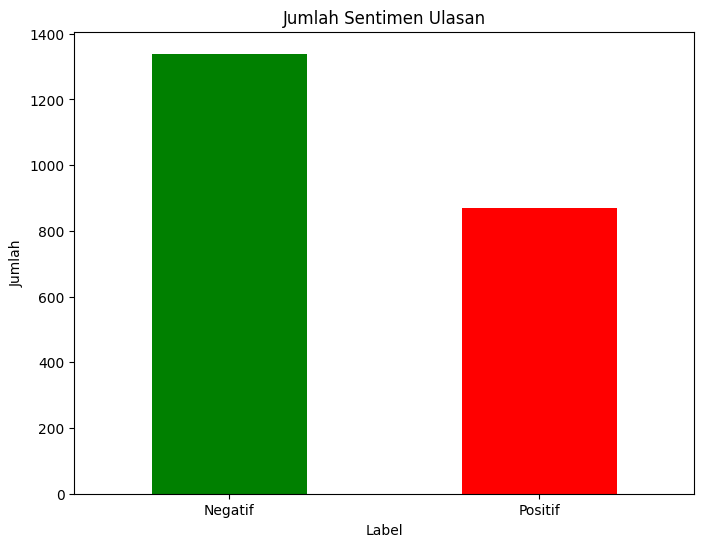

In [49]:
# Membuat grafik bar untuk jumlah label
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['green','red'])
plt.title('Jumlah Sentimen Ulasan')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

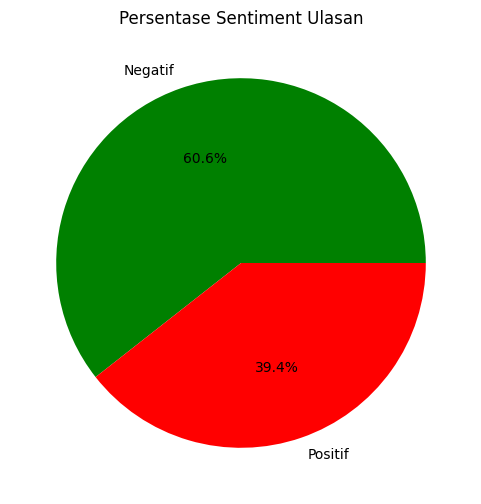

In [50]:
# Membuat grafik pie untuk persentase label
plt.figure(figsize=(6, 6))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Persentase Sentiment Ulasan')
plt.ylabel('')
plt.show()

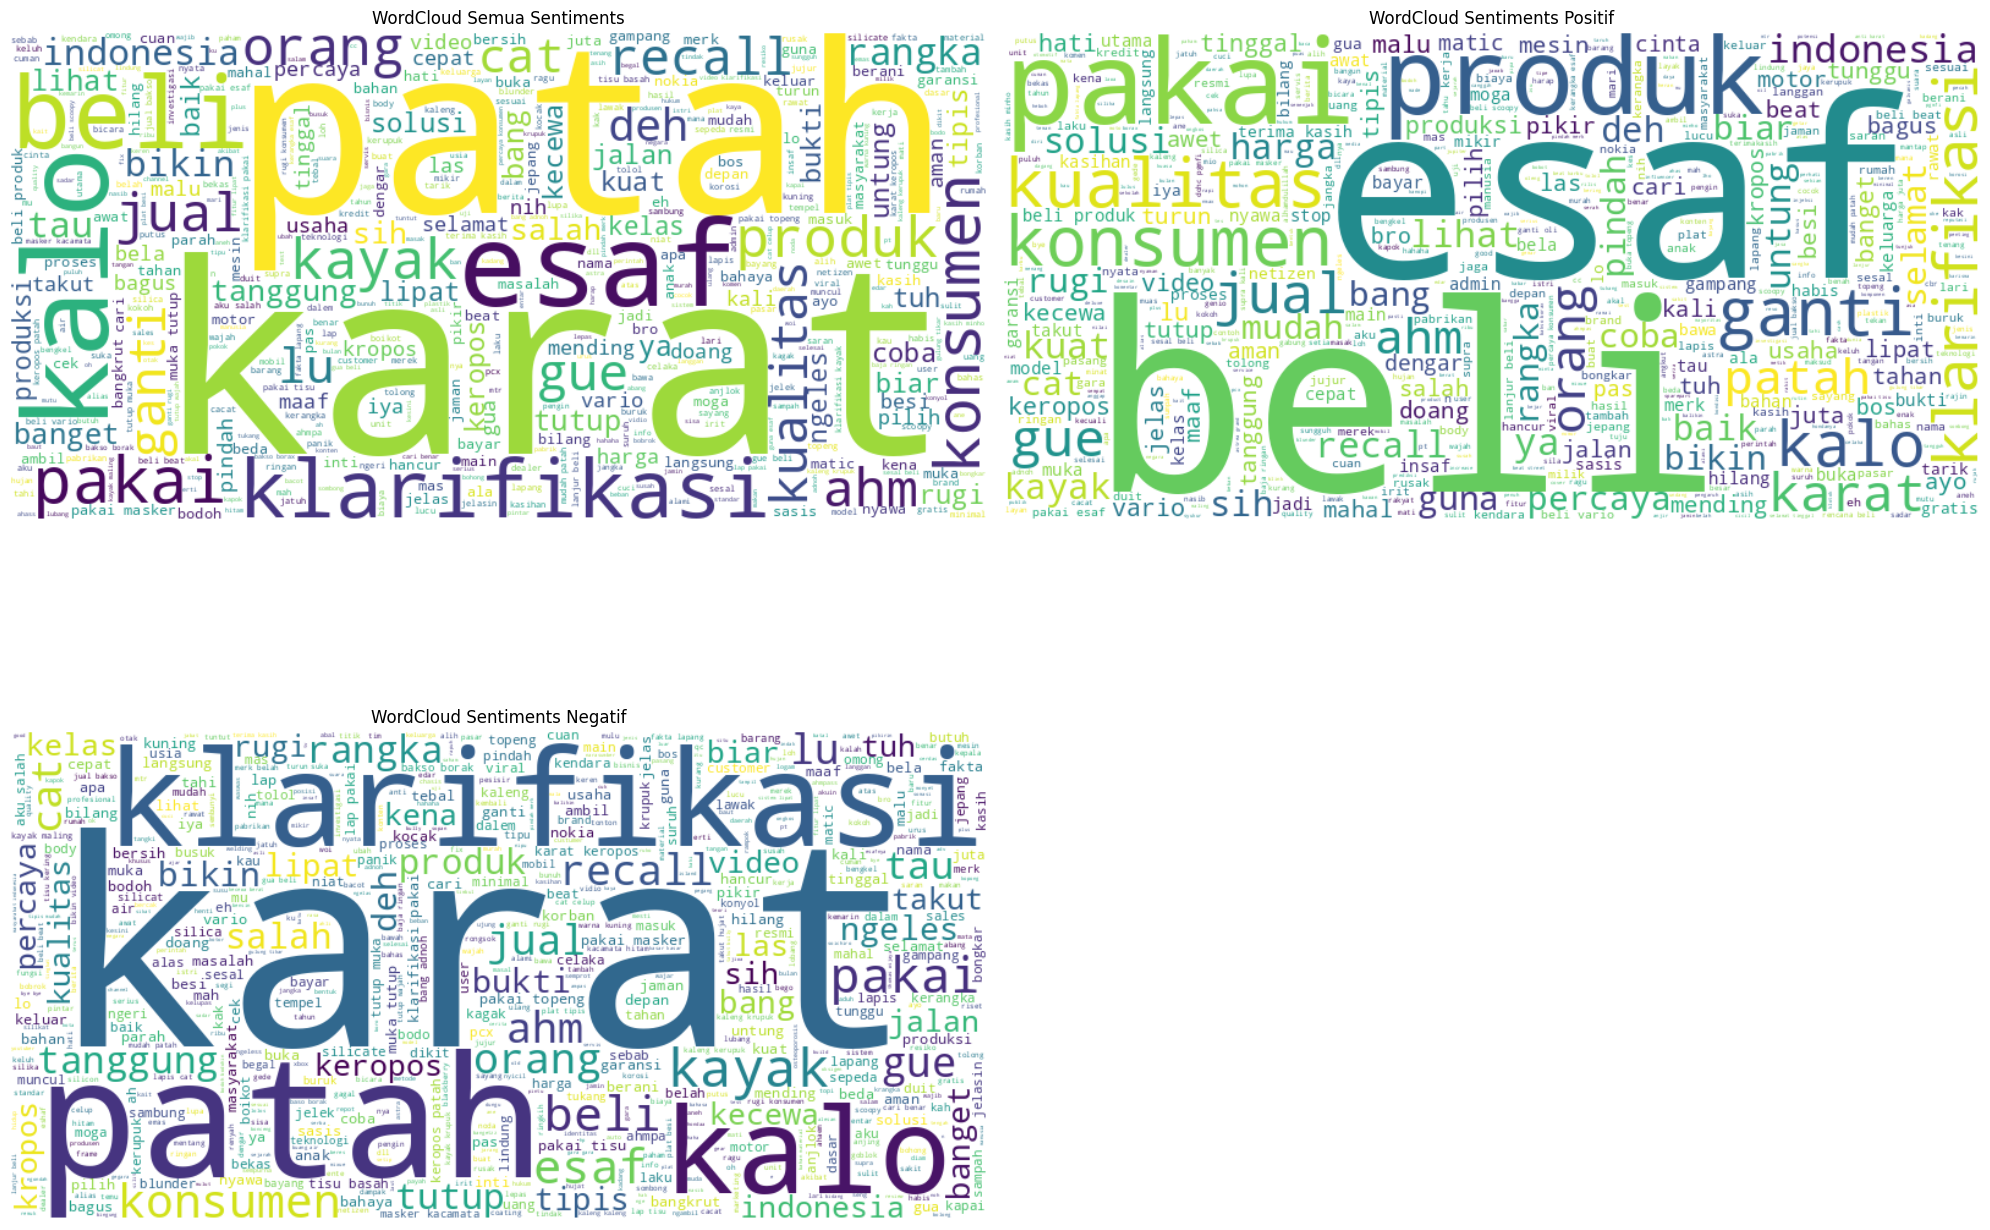

In [51]:
# Menggabungkan semua teks untuk WordCloud
all_text = ' '.join(data['text'])
positif_text = ' '.join(data[data['sentiment_label'] == 'Positif']['text'])
negatif_text = ' '.join(data[data['sentiment_label'] == 'Negatif']['text'])

# Membuat WordCloud untuk semua teks dan setiap kategori Sentiments
wordcloud_all = WordCloud(width=800, height=400, background_color='white', max_words=10000).generate(all_text)
wordcloud_positif = WordCloud(width=800, height=400, background_color='white', max_words=10000).generate(positif_text)
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white', max_words=10000).generate(negatif_text)

# Menampilkan WordCloud
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('WordCloud Semua Sentiments')
plt.axis('off')

plt.subplot(222)
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('WordCloud Sentiments Positif')
plt.axis('off')

plt.subplot(223)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('WordCloud Sentiments Negatif')
plt.axis('off')

plt.tight_layout()
plt.show()


In [52]:
# Membuat fungsi untuk menghitung kata-kata yang paling sering muncul
def most_common_words(text):
    words = text.split()
    word_count = Counter(words)
    return word_count.most_common(10)  # Mengambil 10 kata paling sering muncul

# Menghitung kata-kata yang paling sering muncul untuk setiap sentimen
all_word_common = most_common_words(all_text)
positif_common = most_common_words(positif_text)
negatif_common = most_common_words(negatif_text)

# Membuat DataFrame dari kata-kata yang paling sering muncul
df_all_word_common = pd.DataFrame(all_word_common, columns=['Kata', 'Jumlah'])
df_positif_common = pd.DataFrame(positif_common, columns=['Kata', 'Jumlah'])
df_negatif_common = pd.DataFrame(negatif_common, columns=['Kata', 'Jumlah'])
# Menampilkan DataFrame
print("Kata-kata yang paling sering muncul pada Semua Kata:")
print(df_all_word_common)
print("Kata-kata yang paling sering muncul pada Sentimen Positif:")
print(df_positif_common)
print("\nKata-kata yang paling sering muncul pada Sentimen Negatif:")
print(df_negatif_common)

Kata-kata yang paling sering muncul pada Semua Kata:
          Kata  Jumlah
0         beli     365
1        pakai     356
2        karat     336
3        patah     281
4  klarifikasi     275
5         esaf     267
6         kalo     224
7     konsumen     224
8        kayak     187
9       produk     186
Kata-kata yang paling sering muncul pada Sentimen Positif:
          Kata  Jumlah
0         beli     235
1         esaf     161
2        pakai     139
3       produk     130
4     konsumen     115
5     kualitas     108
6        ganti     108
7         kalo      90
8  klarifikasi      87
9         jual      80

Kata-kata yang paling sering muncul pada Sentimen Negatif:
          Kata  Jumlah
0        karat     267
1        patah     219
2        pakai     217
3  klarifikasi     188
4        kayak     146
5         kalo     134
6         beli     130
7     konsumen     109
8        tutup     107
9         esaf     106


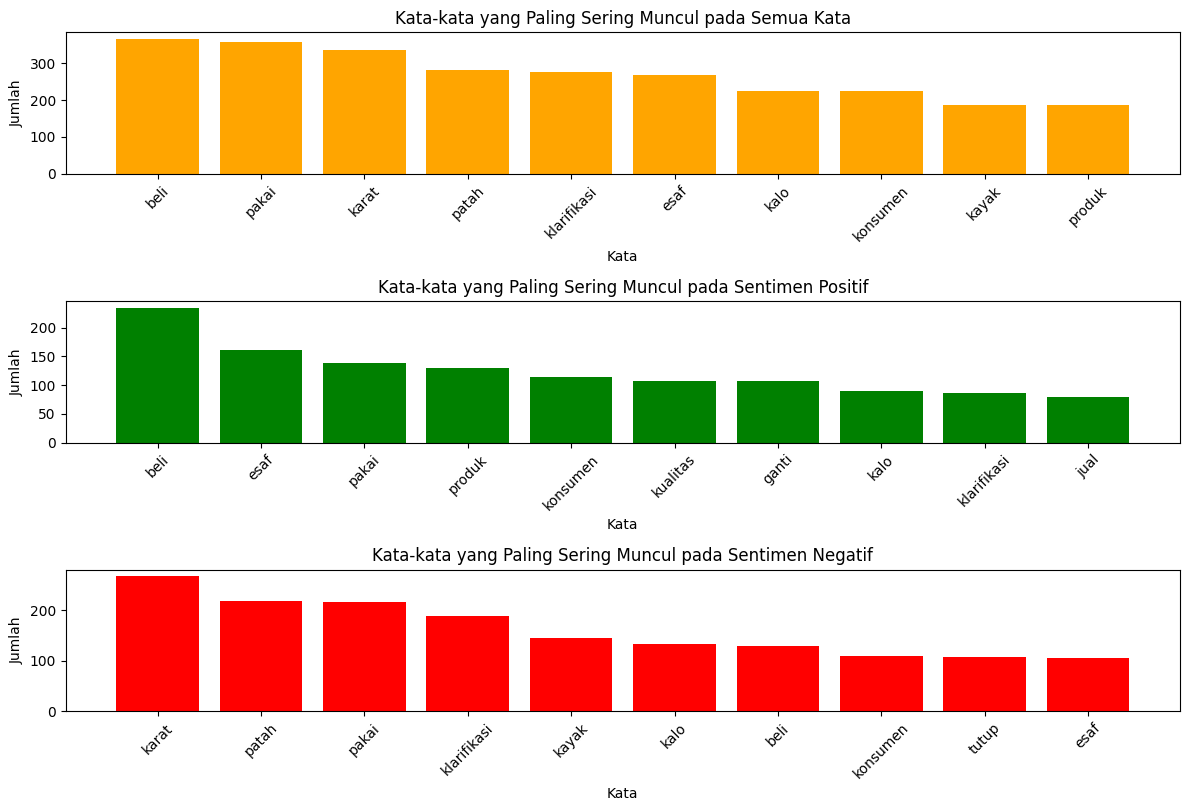

In [53]:
# Membuat grafik untuk kata-kata yang paling sering muncul
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.bar(df_all_word_common['Kata'], df_all_word_common['Jumlah'], color='orange')
plt.title('Kata-kata yang Paling Sering Muncul pada Semua Kata')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(412)
plt.bar(df_positif_common['Kata'], df_positif_common['Jumlah'], color='green')
plt.title('Kata-kata yang Paling Sering Muncul pada Sentimen Positif')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(413)
plt.bar(df_negatif_common['Kata'], df_negatif_common['Jumlah'], color='red')
plt.title('Kata-kata yang Paling Sering Muncul pada Sentimen Negatif')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Analisis Sentimen Terhadap Ulasan Aplikasi Lazada Menggunakan Metode Naive Bayes dan SVM

In [54]:
# Melihat perbandingan jumlah label
data.sentiment_label.value_counts()

sentiment_label
Negatif    1339
Positif     871
Name: count, dtype: int64

In [55]:
# Melihat perbandingan persentase jumlah label
data.sentiment_label.value_counts(normalize=True)

sentiment_label
Negatif    0.605882
Positif    0.394118
Name: proportion, dtype: float64

## Split Data

In [56]:
# Memisahkan fitur (X) dan target (y)
X = data['text']  # Menggunakan teks yang telah diterjemahkan sebagai fitur
y = data['sentiment_label']  # Kolom sentimen sebagai target


In [57]:
# Pembagian data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


## Feature Ekstraktor (TF-IDF)

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode dalam pemrosesan bahasa alami dan informasi teks yang digunakan untuk mengevaluasi pentingnya sebuah kata dalam sebuah dokumen relatif terhadap kumpulan dokumen.

### Konsep Dasar TF-IDF:
1. **Term Frequency (TF):**
   - Mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen.
   - Formula dasar untuk menghitung TF:   
     \(\text{TF}(t) = \frac{\text{jumlah kemunculan kata } t \text{ dalam dokumen}}{\text{total kata dalam dokumen}}\)

2. **Inverse Document Frequency (IDF):**
   - Mengukur seberapa penting sebuah kata dengan cara mengurangi bobot kata yang sering muncul di seluruh dokumen.
   - Formula dasar untuk menghitung IDF:  
     \(\text{IDF}(t) = \log\left(\frac{\text{total dokumen}}{\text{jumlah dokumen yang mengandung kata } t}\right)\)
   - Ini mengurangi bobot kata-kata umum yang muncul di banyak dokumen dan meningkatkan bobot kata-kata yang muncul di sedikit dokumen.

3. **TF-IDF:**
   - Menggabungkan nilai TF dan IDF untuk menentukan bobot kata dalam sebuah dokumen dalam konteks seluruh kumpulan dokumen.
   - Formula dasar untuk menghitung TF-IDF:  
     \(\text{TF-IDF}(t) = \text{TF}(t) \times \text{IDF}(t)\)
   - Semakin tinggi nilai TF-IDF suatu kata dalam dokumen tertentu, semakin penting kata tersebut dalam konteks dokumen tersebut.

### Penggunaan TF-IDF:
- **Pemrosesan Teks:** Digunakan dalam analisis teks, pengelompokan dokumen, informasi-retrieval, dan klasifikasi teks.
- **Information Retrieval:** Membantu dalam menemukan dokumen yang relevan berdasarkan kesesuaian kata-kata kunci.
- **Text Mining:** Identifikasi kata-kata kunci yang paling penting dalam dokumen.
- **Rekomendasi: **Mengidentifikasi kata-kata yang menentukan untuk merekomendasikan konten.

### Manfaat TF-IDF:
- **Menghilangkan Kata-kata Umum:** Kata-kata umum seperti "dan", "atau", "di" akan memiliki nilai TF-IDF yang rendah karena keberadaannya yang umum di banyak dokumen.
- **Mengidentifikasi Kata Penting:** Membantu mengidentifikasi kata-kata kunci atau frasa yang paling penting dalam suatu dokumen.
- **Menyederhanakan Representasi Teks:** Mengubah teks menjadi vektor numerik, yang merupakan input umum untuk banyak model machine learning dalam pemrosesan teks.

TF-IDF adalah alat yang penting dalam analisis teks yang membantu dalam mengukur pentingnya sebuah kata dalam sebuah dokumen dengan mempertimbangkan frekuensi dan distribusi kata-kata tersebut dalam seluruh koleksi dokumen.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi vektorisasi TF-IDF
vectorizer = TfidfVectorizer()

# Transformasi teks pada data latih dan data uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Mengambil daftar kata-kata dari vektorisasi
words = vectorizer.get_feature_names_out()

# Mendapatkan skor TF-IDF untuk data latih
train_tfidf_scores = X_train_vectorized.toarray()

# Mendapatkan skor TF-IDF untuk data uji
test_tfidf_scores = X_test_vectorized.toarray()

# Membuat DataFrame untuk skor TF-IDF data latih
train_tfidf_df = pd.DataFrame(train_tfidf_scores, columns=words)
print("Skor TF-IDF untuk data latih:")
train_tfidf_df

Skor TF-IDF untuk data latih:


,abad,abadi,abai,abal,abang,abis,acara,acceptance,accu,aco,...,you,youran,youtube,youtuber,yth,yuk,ywes,zaman,zat,zolimi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Inisialisasi model Complement Naive Bayes
nb_classifier = ComplementNB()

# Melatih model Complement Naive Bayes menggunakan data latih yang telah divectorized
nb_classifier.fit(X_train_vectorized, y_train)

# Evaluasi model pada data uji
nb_predictions = nb_classifier.predict(X_test_vectorized)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix Complement Naive Bayes:")
print(conf_matrix_nb)

# Laporan Klasifikasi
print("\nClassification Report Complement Naive Bayes:")
print(classification_report(y_test, nb_predictions))

# Menghitung metrik evaluasi dalam persentase
accuracy_nb = accuracy_score(y_test, nb_predictions)
precision_nb = precision_score(y_test, nb_predictions, average='weighted')
recall_nb = recall_score(y_test, nb_predictions, average='weighted')
f1_nb = f1_score(y_test, nb_predictions, average='weighted')

# Konversi nilai ke dalam persentase
accuracy_nb *= 100
precision_nb *= 100
recall_nb *= 100
f1_nb *= 100

print(f"\nAkurasi Complement Naive Bayes: {accuracy_nb:.2f}%")
print(f"Presisi Complement Naive Bayes: {precision_nb:.2f}%")
print(f"Recall Complement Naive Bayes: {recall_nb:.2f}%")
print(f"F1-score Complement Naive Bayes: {f1_nb:.2f}%")


Confusion Matrix Complement Naive Bayes:
[[110  22]
 [ 26  63]]

Classification Report Complement Naive Bayes:
              precision    recall  f1-score   support

     Negatif       0.81      0.83      0.82       132
     Positif       0.74      0.71      0.72        89

    accuracy                           0.78       221
   macro avg       0.78      0.77      0.77       221
weighted avg       0.78      0.78      0.78       221


Akurasi Complement Naive Bayes: 78.28%
Presisi Complement Naive Bayes: 78.16%
Recall Complement Naive Bayes: 78.28%
F1-score Complement Naive Bayes: 78.19%


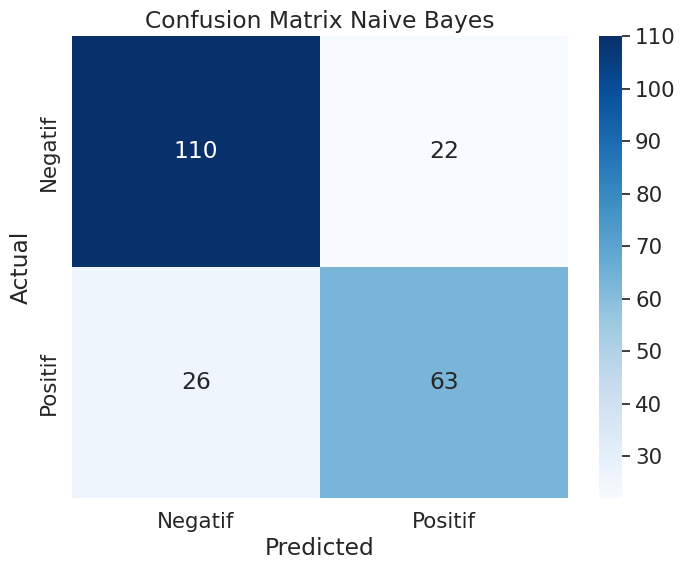

In [60]:
# Membuat Confusion Matrix
labels = np.unique(y_test)  # Mengambil label unik dari y_test
sns.set(font_scale=1.4)  # Skala font untuk tampilan

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

## Prediksi Dengan Naive Bayes

In [61]:
# Contoh teks baru yang ingin diprediksi sentimennya
new_text = "bagus"

# Menerapkan proses transformasi teks baru ke dalam vektor yang dapat dipahami oleh model
new_text_vectorized = vectorizer.transform([new_text])

# Melakukan prediksi sentimen pada teks baru menggunakan model SVM terbaik yang telah dilatih sebelumnya
predicted_sentiment = nb_classifier.predict(new_text_vectorized)

# Menampilkan hasil prediksi
print(f"Teks: {new_text}")
print(f"Sentimen Prediksi: {predicted_sentiment[0]}")

Teks: bagus
Sentimen Prediksi: Positif


## Save Model

In [62]:
import pickle

# Simpan model Naive Bayes
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)


## Load Model

In [63]:
# Memuat kembali model Naive Bayes
with open('naive_bayes_model.pkl', 'rb') as file:
    loaded_nb_model = pickle.load(file)

## Prediksi Model yang sudah di load

In [64]:
# Contoh teks baru yang ingin diprediksi sentimennya
new_text = "bagus"

# Menerapkan proses transformasi teks baru ke dalam vektor yang dapat dipahami oleh model
new_text_vectorized = vectorizer.transform([new_text])

# Melakukan prediksi sentimen pada teks baru menggunakan model SVM terbaik yang telah dilatih sebelumnya
predicted_sentiment = loaded_nb_model.predict(new_text_vectorized) # Prediksi dengan model yang sudah di load

# Menampilkan hasil prediksi
print(f"Teks: {new_text}")
print(f"Sentimen Prediksi: {predicted_sentiment[0]}")

Teks: bagus
Sentimen Prediksi: Positif
